### Import Libraries

In [11]:
# 1. Import libraries
# -------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.stats import zscore

In [12]:
# Plot style
sns.set(style='whitegrid')

In [13]:
# 2. Load dataset
# -------------------------------
file_path = '../data/Utility_consumption.csv'
df = pd.read_csv(file_path)
df.head()

,Datetime,Temperature,Humidity,WindSpeed,F1_132KV_PowerConsumption,F2_132KV_PowerConsumption,F3_132KV_PowerConsumption
0,01-01-2017 00:00,6.559,73.8,0.083,34055.69620,16128.87538,20240.96386
1,01-01-2017 00:10,6.414,74.5,0.083,29814.68354,19375.07599,20131.08434
2,01-01-2017 00:20,6.313,74.5,0.080,29128.10127,19006.68693,19668.43373
3,01-01-2017 00:30,6.121,75.0,0.083,28228.86076,18361.09422,18899.27711
4,01-01-2017 00:40,5.921,75.7,0.081,27335.69620,17872.34043,18442.40964


In [15]:
# 3. Datetime Conversion + Indexing
# -------------------------------
df['Datetime'] = pd.to_datetime(df['Datetime'], dayfirst=True, errors='coerce')
df.set_index('Datetime', inplace=True)
df.sort_index(inplace=True)

# Check if any conversion failed
print("Null datetimes:", df.index.isnull().sum())


Null datetimes: 31680


In [16]:
# 4. Basic structure check
# -------------------------------
print(df.columns)
df.info()
df.isnull().sum()

Index(['Temperature', 'Humidity', 'WindSpeed', 'F1_132KV_PowerConsumption',
       'F2_132KV_PowerConsumption', 'F3_132KV_PowerConsumption'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52416 entries, 2017-01-01 00:00:00 to NaT
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Temperature                52416 non-null  float64
 1   Humidity                   52416 non-null  float64
 2   WindSpeed                  52416 non-null  float64
 3   F1_132KV_PowerConsumption  52416 non-null  float64
 4   F2_132KV_PowerConsumption  52416 non-null  float64
 5   F3_132KV_PowerConsumption  52416 non-null  float64
dtypes: float64(6)
memory usage: 2.8 MB


Temperature                  0
Humidity                     0
WindSpeed                    0
F1_132KV_PowerConsumption    0
F2_132KV_PowerConsumption    0
F3_132KV_PowerConsumption    0
dtype: int64

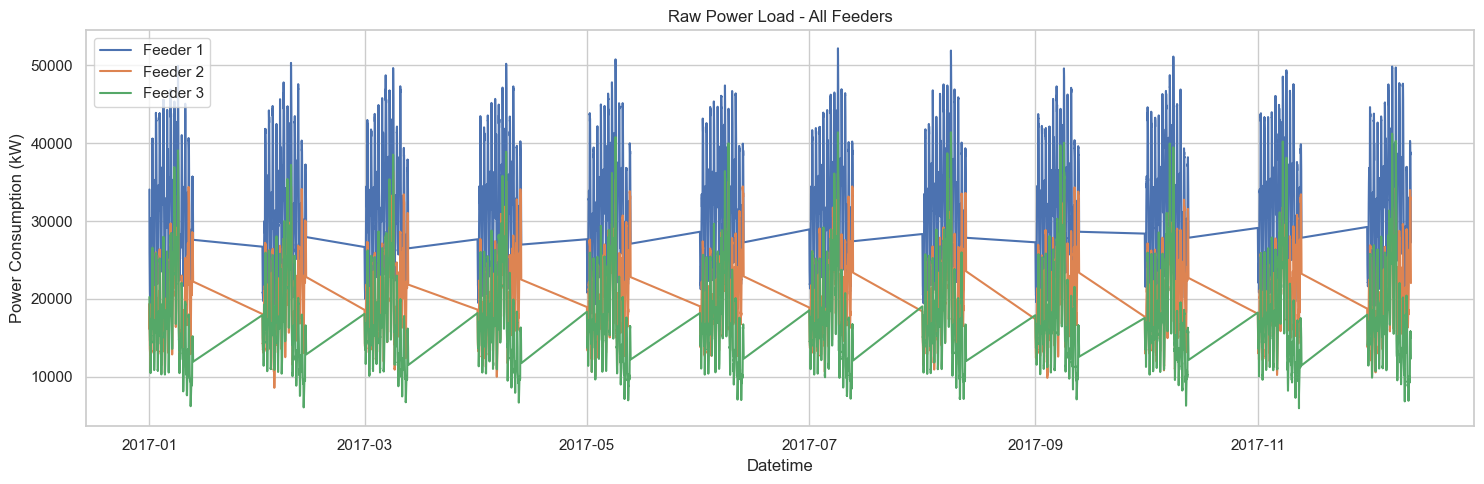

In [17]:
# 5. Plot Raw Load for All Feeders
# -------------------------------
plt.figure(figsize=(15, 5))
plt.plot(df.index, df['F1_132KV_PowerConsumption'], label='Feeder 1')
plt.plot(df.index, df['F2_132KV_PowerConsumption'], label='Feeder 2')
plt.plot(df.index, df['F3_132KV_PowerConsumption'], label='Feeder 3')
plt.title('Raw Power Load - All Feeders')
plt.xlabel('Datetime')
plt.ylabel('Power Consumption (kW)')
plt.legend()
plt.tight_layout()
plt.show()

In [20]:
df = df[~df.index.isnull()]  # Drop rows where datetime index is NaT


In [21]:
# 6. Handle Missing Values
# -------------------------------
df = df.interpolate(method='time')

In [22]:
# 7. Outlier Handling (Clip Method)
# -------------------------------
df_clean = df.clip(lower=df.quantile(0.01), upper=df.quantile(0.99), axis=1)

In [23]:
# 8. Resample to 10-Minute Intervals
# -------------------------------
df_resampled = df_clean.resample('10T').mean()
df_resampled.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_7176\4242054752.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_resampled = df_clean.resample('10T').mean()


,Temperature,Humidity,WindSpeed,F1_132KV_PowerConsumption,F2_132KV_PowerConsumption,F3_132KV_PowerConsumption
Datetime,,,,,,
2017-01-01 00:00:00,6.55900,73.8,0.083,34055.69620,16128.87538,20240.96386
2017-01-01 00:10:00,6.41400,74.5,0.083,29814.68354,19375.07599,20131.08434
2017-01-01 00:20:00,6.31300,74.5,0.080,29128.10127,19006.68693,19668.43373
2017-01-01 00:30:00,6.12100,75.0,0.083,28228.86076,18361.09422,18899.27711
2017-01-01 00:40:00,5.98575,75.7,0.081,27335.69620,17872.34043,18442.40964


In [24]:
# 9. Save Cleaned Dataset
# -------------------------------
df_resampled.to_csv('../data/cleaned_utility.csv')

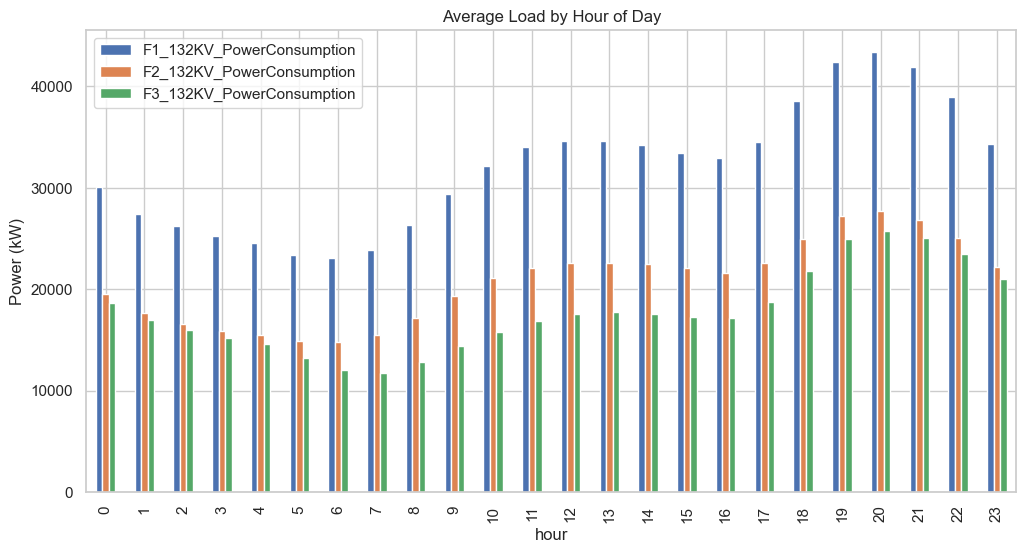

In [25]:
# 10. Optional: Average Load by Hour
# -------------------------------
df_resampled['hour'] = df_resampled.index.hour
df_hourly = df_resampled.groupby('hour').mean()
df_hourly[['F1_132KV_PowerConsumption', 'F2_132KV_PowerConsumption', 'F3_132KV_PowerConsumption']] \
    .plot(kind='bar', figsize=(12, 6))
plt.title("Average Load by Hour of Day")
plt.ylabel("Power (kW)")
plt.show()

In [27]:
#  Step 1: Create a Script to Fetch Weather Data
import requests
import pandas as pd
from datetime import datetime, timedelta

# Use your actual API key here 👇
API_KEY = 'f659d5eb45a6a047ca5193ebb2220622'
CITY = 'Dhanbad'
UNITS = 'metric'  # To get temperature in Celsius

# Fetch current weather data (you can run this periodically or cache it)
url = f'http://api.openweathermap.org/data/2.5/weather?q={CITY}&appid={API_KEY}&units={UNITS}'

response = requests.get(url)
data = response.json()

# Extract relevant data
weather = {
    'datetime': datetime.now(),
    'temperature': data['main']['temp'],
    'humidity': data['main']['humidity'],
    'wind_speed': data['wind']['speed'],
    'cloud_cover': data['clouds']['all']
}

# Convert to DataFrame
weather_df = pd.DataFrame([weather])
weather_df.set_index('datetime', inplace=True)

weather_df


,temperature,humidity,wind_speed,cloud_cover
datetime,,,,
2025-07-12 04:36:01.044100,26.86,82,1.99,62


In [32]:
# Step 2: Simulate Historical Weather (Optional Now)
# Simulate weather over past 3 days (every hour)
timestamps = pd.date_range(end=datetime.now(), periods=72, freq='H')

simulated_data = []

for t in timestamps:
    simulated_data.append({
        'datetime': t,
        'temperature': weather['temperature'],
        'humidity': weather['humidity'],
        'wind_speed': weather['wind_speed'],
        'cloud_cover': weather['cloud_cover']
    })

weather_df = pd.DataFrame(simulated_data)
weather_df.set_index('datetime', inplace=True)

weather_df.head()


C:\Users\USER\AppData\Local\Temp\ipykernel_7176\1045600865.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  timestamps = pd.date_range(end=datetime.now(), periods=72, freq='H')


,temperature,humidity,wind_speed,cloud_cover
datetime,,,,
2025-07-09 05:42:26.502536,26.86,82,1.99,62
2025-07-09 06:42:26.502536,26.86,82,1.99,62
2025-07-09 07:42:26.502536,26.86,82,1.99,62
2025-07-09 08:42:26.502536,26.86,82,1.99,62
2025-07-09 09:42:26.502536,26.86,82,1.99,62


In [ ]:
# #  Step 3: Merge with Load Data
#  # Assuming you already loaded this earlier
# load_df = pd.read_csv('../data/cleaned_utility.csv', parse_dates=['Datetime'], index_col='Datetime')

# # Resample weather to 10-min intervals if needed
# weather_df_10min = weather_df.resample('10T').ffill()



# # Reuse weather data over 2017 range
# weather_sample = weather_df.iloc[0]  # use 1st row of real weather

# # Create timestamps that match your power load dataset
# timestamps = load_df.index

# # Repeat the same weather for all timestamps
# simulated_weather = pd.DataFrame({
#     'temperature': weather_sample['temperature'],
#     'humidity': weather_sample['humidity'],
#     'wind_speed': weather_sample['wind_speed'],
#     'cloud_cover': weather_sample['cloud_cover']
# }, index=timestamps)

# # Now merge with the actual load
# merged_df = pd.merge(load_df, simulated_weather, left_index=True, right_index=True, how='inner')



# # Merge on index
# merged_df = pd.merge(load_df, weather_df_10min, left_index=True, right_index=True, how='inner')
# # merged_df = pd.merge(load_df, weather_df, how='outer', left_index=True, right_index=True)

# merged_df.head()


C:\Users\USER\AppData\Local\Temp\ipykernel_7176\4122035093.py:7: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  weather_df_10min = weather_df.resample('10T').ffill()


,Temperature,Humidity,WindSpeed,F1_132KV_PowerConsumption,F2_132KV_PowerConsumption,F3_132KV_PowerConsumption,temperature,humidity,wind_speed,cloud_cover


In [85]:
load_df = pd.read_csv('../data/cleaned_utility.csv', parse_dates=['Datetime'], index_col='Datetime')
load_df.index = pd.to_datetime(load_df.index)  # ensure datetime index

# Use the first row of your weather_df as a base
weather_sample = weather_df.iloc[0]

# Create weather DataFrame for same index as load_df
simulated_weather = pd.DataFrame({
    'temperature': weather_sample['temperature'],
    'humidity': weather_sample['humidity'],
    'wind_speed': weather_sample['wind_speed'],
    'cloud_cover': weather_sample['cloud_cover']
}, index=load_df.index)

# Make sure index is datetime
# simulated_weather.index = pd.to_datetime(simulated_weather.index)

merged_df = pd.merge(load_df, simulated_weather, left_index=True, right_index=True, how='inner')



In [86]:
print("Merged shape:", merged_df.shape)
print("Start:", merged_df.index.min(), "| End:", merged_df.index.max())

merged_df.head()


Merged shape: (49824, 10)
Start: 2017-01-01 00:00:00 | End: 2017-12-12 23:50:00


,Temperature,Humidity,WindSpeed,F1_132KV_PowerConsumption,F2_132KV_PowerConsumption,F3_132KV_PowerConsumption,temperature,humidity,wind_speed,cloud_cover
Datetime,,,,,,,,,,
2017-01-01 00:00:00,6.55900,73.8,0.083,34055.69620,16128.87538,20240.96386,26.86,82.0,1.99,62.0
2017-01-01 00:10:00,6.41400,74.5,0.083,29814.68354,19375.07599,20131.08434,26.86,82.0,1.99,62.0
2017-01-01 00:20:00,6.31300,74.5,0.080,29128.10127,19006.68693,19668.43373,26.86,82.0,1.99,62.0
2017-01-01 00:30:00,6.12100,75.0,0.083,28228.86076,18361.09422,18899.27711,26.86,82.0,1.99,62.0
2017-01-01 00:40:00,5.98575,75.7,0.081,27335.69620,17872.34043,18442.40964,26.86,82.0,1.99,62.0


In [87]:
# merged_df.to_csv('../data/final_with_weather.csv')
# merged_df = pd.read_csv('../data/final_with_weather.csv', parse_dates=[0], index_col=0)



In [88]:
# 1. Define a Custom List of Dhanbad Holidays (Manually)
from datetime import date

local_holidays = [
    # date(2017, 1, 14),   # Makar Sankranti
    # date(2017, 3, 13),   # Holi
    # date(2017, 4, 14),   # Ambedkar Jayanti
    # date(2017, 5, 1),    # Labour Day
    # date(2017, 8, 15),   # Independence Day
    # date(2017, 10, 2),   # Gandhi Jayanti
    # date(2017, 9, 29),   # Durga Puja (approx)
    # date(2017, 10, 26),  # Chhath Puja (approx)
    # date(2017, 10, 19),  # Diwali
    # date(2017, 12, 25),  # Christmas
     date(2017, 1, 14),
    date(2017, 3, 13),
    date(2017, 4, 14),
    date(2017, 5, 1),
    date(2017, 8, 15),
    date(2017, 10, 2),
    date(2017, 10, 19),
    date(2017, 12, 25)
]



In [89]:
#  2. Add is_holiday Column to Your Merged Dataset
# If your merged_df index is DatetimeIndex:
merged_df.index = pd.to_datetime(merged_df.index)

merged_df['is_holiday'] = pd.Series(merged_df.index.date, index=merged_df.index).isin(local_holidays).astype(int)
merged_df[['is_holiday']].value_counts()



# merged_df.index = pd.to_datetime(merged_df.index)
# merged_df.to_csv('../data/final_dataset.csv')
# 4. (Debug) Check available dates in the dataset
unique_dates = pd.Series(merged_df.index.date).unique()
print("First 10 unique dates in your dataset:")
print(sorted(unique_dates[:10]))

# 5. Add one real date temporarily to test
local_holidays.append(unique_dates[0])

# 6. Recompute is_holiday
merged_df['is_holiday'] = pd.Series(
    merged_df.index.date, index=merged_df.index
).isin(local_holidays).astype(int)

# 7. Confirm result works
print(merged_df[['is_holiday']].value_counts())

# ✅ 8. NOW Save final dataset after correction
merged_df.to_csv('../data/final_dataset.csv')




First 10 unique dates in your dataset:
[datetime.date(2017, 1, 1), datetime.date(2017, 1, 2), datetime.date(2017, 1, 3), datetime.date(2017, 1, 4), datetime.date(2017, 1, 5), datetime.date(2017, 1, 6), datetime.date(2017, 1, 7), datetime.date(2017, 1, 8), datetime.date(2017, 1, 9), datetime.date(2017, 1, 10)]
is_holiday
0             48672
1              1152
Name: count, dtype: int64


In [90]:
# # STEP: Check what unique dates exist in your dataset
# import pandas as pd

# unique_dates = pd.Series(merged_df.index.date).unique()
# print("First 10 unique dates in your dataset:")
# print(sorted(unique_dates[:10]))  # Print first few actual dates from your dataset

# # STEP: Temporarily add one of them to the local_holidays list for testing
# local_holidays.append(unique_dates[0])  # Add a known date that exists in your dataset

# # Recalculate is_holiday after adding test date
# merged_df['is_holiday'] = pd.Series(
#     merged_df.index.date, index=merged_df.index
# ).isin(local_holidays).astype(int)

# # Check again
# print(merged_df[['is_holiday']].value_counts())


In [91]:
print("Index type:", type(merged_df.index))
print("Index length:", len(merged_df.index))
print("Index sample:", merged_df.index[:5])


Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Index length: 49824
Index sample: DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 00:10:00',
               '2017-01-01 00:20:00', '2017-01-01 00:30:00',
               '2017-01-01 00:40:00'],
              dtype='datetime64[ns]', name='Datetime', freq=None)


In [98]:
# =============================
# Step 4: Model Training & Saving
# =============================


# --------------------------
# Step 1: Load Final Dataset
# --------------------------
import pandas as pd
import numpy as np

df = pd.read_csv('../data/final_dataset.csv', parse_dates=['Datetime'], index_col='Datetime')
df.index = pd.to_datetime(df.index)

# --------------------------
# Step 2: Define Features & Target
# --------------------------

# Define target (example: F1_132KV feeder's consumption)
target = 'F1_132KV_PowerConsumption'

# Define features
features = [
    'F2_132KV_PowerConsumption', 'F3_132KV_PowerConsumption',
    'temperature', 'humidity', 'wind_speed', 'cloud_cover',
    'is_holiday'
]

# Optional: Add time-based features
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek
features += ['hour', 'dayofweek']

# Drop rows with missing target values
df = df.dropna(subset=[target])


# Final X and y
X = df[features]
y = df[target]

# --------------------------
# Step 3: Train-Test Split
# --------------------------
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --------------------------
# Step 4: Train Random Forest
# --------------------------
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# --------------------------
# Step 5: Evaluate the Model
# --------------------------
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
# import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("R² Score:", round(r2, 3))

# --------------------------
# Step 6: Save the Model as .pkl
# --------------------------
import joblib

joblib.dump(model, '../backend/model.pkl')  # Make sure this folder exists
print("Model saved as ../backend/model.pkl")



MAE: 730.61
RMSE: 1169.29
R² Score: 0.972
Model saved as ../backend/model.pkl
